In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import Column, Integer, String, Float, DateTime

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
import datetime
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import datetime as dt
from scipy import stats
from numpy import mean

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
#Measurement class
measurement = Base.classes.measurement
#station class
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
station_head = session.query(station).first()
station_head.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22c0a98d580>,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716}

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
results = session.query(measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs).\
    order_by(measurement.date.desc()).first()
print(results)

(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)


In [26]:
results = session.query(measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs).first()
print(results)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)


In [11]:
# Find 12 months filter date


2016-08-23


Text(0, 0.5, 'Inches')

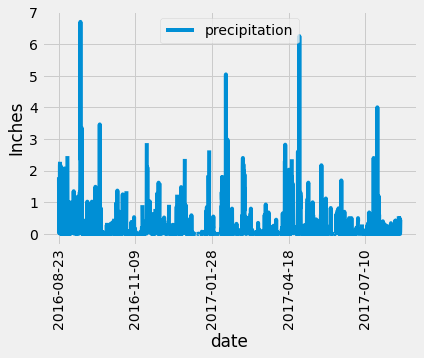

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
days = datetime.timedelta(365)
var = datetime.date(2017, 8 , 23) - days
print(var)
# Perform a query to retrieve the data and precipitation scores
results= session.query(measurement.date, measurement.prcp).filter(measurement.date >= var).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
pd2 = pd.DataFrame(results, columns=['date', 'precipitation'])


# Sort the dataframe by date
pd2 = pd2.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
pd2.plot(x = 'date' , y = "precipitation", rot = 90)
plt.xlabel("date")
plt.ylabel("Inches")



In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pd2.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).all()


[(9)]

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs).filter(measurement.station == 'USC00519281' )).all()

[(53.0, 87.0, 71.66378066378067)]

Text(0.5, -1.340000000000014, 'Temperature')

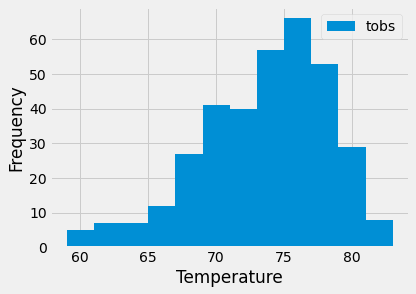

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
from pandas.plotting import table
days = datetime.timedelta(365)
var = datetime.date(2017, 8 , 23) - days
result = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= var).all()
df= pd.DataFrame(result, columns= ['tobs'])
df.plot.hist(bins= 12)
plt.tight_layout()
plt.xlabel("Temperature")

# Close session

In [25]:
# Close Session
session.close()